In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, max_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
player_ratings = pd.read_csv("player_ratings.csv")
player_stats = pd.read_csv("players.csv")

In [58]:
player_stats

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302998,30299,47575,100,131,884,18290,437,583,8,6,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
302999,30299,0,55,132,1065,18165,442,353,14,4,...,1.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
303000,30300,100172,51,0,753,9050,278,321,2,7,...,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
303001,30300,0,7,1,2001,11245,385,509,11,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
player_ratings.sort_values(by='account_id', inplace=True)
player_stats

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302998,30299,47575,100,131,884,18290,437,583,8,6,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
302999,30299,0,55,132,1065,18165,442,353,14,4,...,1.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
303000,30300,100172,51,0,753,9050,278,321,2,7,...,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
303001,30300,0,7,1,2001,11245,385,509,11,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
playerstats_per_match = player_stats.merge(player_ratings, on="account_id")
playerstats_per_match

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue,total_wins,total_matches,trueskill_mu,trueskill_sigma
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1608398,3315071,25.000000,8.333333
1,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,1608398,3315071,25.000000,8.333333
2,0,0,102,129,317,10355,303,369,4,13,...,NaN,NaN,NaN,NaN,NaN,NaN,1608398,3315071,25.000000,8.333333
3,0,0,7,131,475,5035,189,223,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,1608398,3315071,25.000000,8.333333
4,1,0,7,0,76,12160,218,206,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,1608398,3315071,25.000000,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282493,30297,110924,100,2,4201,11840,448,416,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,20,47,26.299240,3.250587
282494,30298,110925,6,129,3507,13705,399,524,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2,21.752653,7.940870
282495,30298,110926,1,130,1213,14125,403,421,6,8,...,NaN,NaN,NaN,NaN,NaN,NaN,3,6,24.705721,7.161537
282496,30299,110927,8,2,1345,13915,419,528,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,7,9,29.040193,6.710027


In [28]:
playerstats_per_match.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_abandon', 'gold_sell', 'gold_destroying_structure',
       'gold_killing_heros', 'gold_killing_creeps', 'gold_killing_roshan',
       'gold_killing_couriers', 'unit_order_none',
       'unit_order_move_to_position', 'unit_order_move_to_target',
       'unit_order_attack_move', 'unit_order_attack_target',
       'unit_order_cast_position', 'unit_order_cast_target',
       'unit_order_cast_target_tree', 'unit_order_cast_no_target',
       'unit_order_cast_toggle', 'unit_order_hold_position',
       'unit_order_train_ability', 'unit_order_drop_item',


In [29]:
relevant = ['match_id', 'account_id', 'gold_per_min', 'xp_per_min', 'kills', 'deaths','assists', 'last_hits', 'hero_damage', 'tower_damage', 'xp_hero', 'xp_creep', 'xp_roshan', 'xp_other', 'gold_killing_heros', 'gold_killing_creeps', 'total_wins','total_matches', 'trueskill_sigma']
playerstats_per_match = playerstats_per_match[relevant]
playerstats_per_match

,match_id,account_id,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_damage,tower_damage,xp_hero,xp_creep,xp_roshan,xp_other,gold_killing_heros,gold_killing_creeps,total_wins,total_matches,trueskill_sigma
0,0,0,347,362,9,3,18,30,8690,143,8840.0,5440.0,NaN,83.0,5145.0,1087.0,1608398,3315071,8.333333
1,0,0,350,385,0,4,15,58,4217,399,6692.0,8112.0,NaN,453.0,2418.0,3697.0,1608398,3315071,8.333333
2,0,0,303,369,4,13,5,107,15028,0,5201.0,9417.0,NaN,1.0,3396.0,4356.0,1608398,3315071,8.333333
3,0,0,189,223,1,14,8,27,4774,0,4798.0,4038.0,NaN,27.0,2127.0,1089.0,1608398,3315071,8.333333
4,1,0,218,206,3,4,9,36,4075,0,3857.0,4652.0,298.0,94.0,2574.0,1479.0,1608398,3315071,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282493,30297,110924,448,416,10,5,11,97,9682,1198,6029.0,6463.0,894.0,1022.0,4115.0,4035.0,20,47,3.250587
282494,30298,110925,399,524,12,1,12,64,15025,4226,12436.0,7929.0,596.0,225.0,5615.0,2536.0,0,2,7.940870
282495,30298,110926,403,421,6,8,12,148,7689,100,6510.0,10414.0,NaN,128.0,3396.0,5482.0,3,6,7.161537
282496,30299,110927,419,528,10,10,4,221,9747,264,10292.0,12463.0,NaN,625.0,4930.0,8498.0,7,9,6.710027


In [30]:
playerstats_per_match.dropna(subset=['trueskill_sigma'], inplace=True)
playerstats_per_match.isnull().sum()

<ipython-input-30-36283901566a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerstats_per_match.dropna(subset=['trueskill_sigma'], inplace=True)


match_id                    0
account_id                  0
gold_per_min                0
xp_per_min                  0
kills                       0
deaths                      0
assists                     0
last_hits                   0
hero_damage                 0
tower_damage                0
xp_hero                  1061
xp_creep                   40
xp_roshan              181432
xp_other                11848
gold_killing_heros        879
gold_killing_creeps       170
total_wins                  0
total_matches               0
trueskill_sigma             0
dtype: int64

In [59]:
zscores = playerstats_per_match["total_wins"].values / playerstats_per_match["total_wins"].std()
print(zscores)

threshold = 0.1

outlier_mask = abs(zscores) > threshold
playerstats_per_match[outlier_mask]["total_wins"]

player_stats_filtered = playerstats_per_match.loc[~outlier_mask]
player_stats_filtered = player_stats_filtered.reset_index()

[2.05205165e+00 2.05205165e+00 2.05205165e+00 ... 3.82750722e-06
 8.93085018e-06 0.00000000e+00]


In [32]:
player_stats_filtered.fillna(0, inplace=True)
#player_stats_filtered.drop(columns=['index'], inplace=True)
player_stats_filtered

,index,match_id,account_id,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_damage,tower_damage,xp_hero,xp_creep,xp_roshan,xp_other,gold_killing_heros,gold_killing_creeps,total_wins,total_matches,trueskill_sigma
0,109643,0,1,494,659,13,3,18,109,23747,423,14331.0,8440.0,2683.0,671.0,6676.0,4317.0,14,24,4.854238
1,109644,9035,1,761,676,28,0,9,375,38862,4089,14130.0,18146.0,0.0,188.0,13416.0,14417.0,14,24,4.854238
2,109645,0,2,599,605,8,4,19,271,14832,6055,8583.0,14230.0,894.0,293.0,4104.0,10432.0,5,8,6.550771
3,109646,10667,2,579,503,11,11,10,491,11153,4206,3361.0,6664.0,0.0,22384.0,7471.0,17464.0,5,8,6.550771
4,109647,0,3,613,762,20,3,17,245,33740,1833,15814.0,14325.0,0.0,62.0,7467.0,9220.0,5,16,5.961434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172850,282493,30297,110924,448,416,10,5,11,97,9682,1198,6029.0,6463.0,894.0,1022.0,4115.0,4035.0,20,47,3.250587
172851,282494,30298,110925,399,524,12,1,12,64,15025,4226,12436.0,7929.0,596.0,225.0,5615.0,2536.0,0,2,7.940870
172852,282495,30298,110926,403,421,6,8,12,148,7689,100,6510.0,10414.0,0.0,128.0,3396.0,5482.0,3,6,7.161537
172853,282496,30299,110927,419,528,10,10,4,221,9747,264,10292.0,12463.0,0.0,625.0,4930.0,8498.0,7,9,6.710027


In [33]:
player_stats_filtered.isnull().sum()

index                  0
match_id               0
account_id             0
gold_per_min           0
xp_per_min             0
kills                  0
deaths                 0
assists                0
last_hits              0
hero_damage            0
tower_damage           0
xp_hero                0
xp_creep               0
xp_roshan              0
xp_other               0
gold_killing_heros     0
gold_killing_creeps    0
total_wins             0
total_matches          0
trueskill_sigma        0
dtype: int64

In [39]:
import pandas as pd

player_stats_filtered.to_csv('player_stats_filtered.csv', index=False)

In [34]:
X = player_stats_filtered[['gold_per_min', 'xp_per_min', 'kills', 'deaths', 'assists', 'last_hits',
           'hero_damage', 'tower_damage', 'xp_hero', 'xp_creep', 'xp_roshan', 'xp_other',
           'gold_killing_heros', 'gold_killing_creeps', 'total_wins', 'total_matches']]
y = player_stats_filtered['trueskill_sigma']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
y_test

73283     8.108490
46735     2.830307
83186     2.695777
96713     5.874304
48900     2.831681
            ...   
170113    6.283890
67613     3.316359
33328     7.013950
104692    6.827601
127152    4.602212
Name: trueskill_sigma, Length: 34571, dtype: float64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(predictions, y_test, model_name):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predictions, color='blue', alpha=0.5, label='Predictions')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_title('Predicted vs Actual trueskill_sigma')
    ax.set_xlabel('Actual trueskill_sigma')
    ax.set_ylabel('Predicted trueskill_sigma')
    plt.show()

LinearRegression() MAE: 0.9850
LinearRegression() MSE: 1.3989
LinearRegression() RMSE: 1.1828
LinearRegression() R-squared: 0.5875
LinearRegression() MedianAE: 0.9871
LinearRegression() MaxError: 15.3000


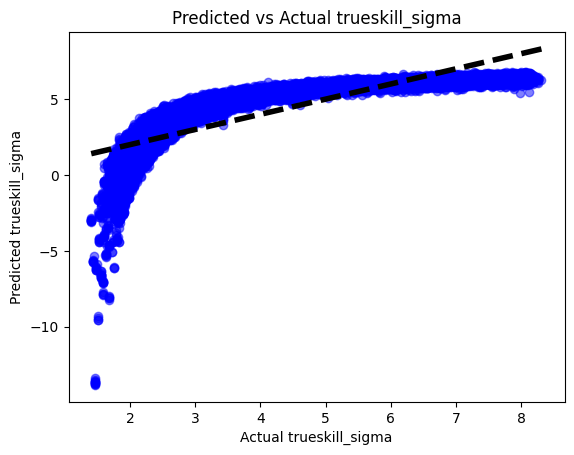

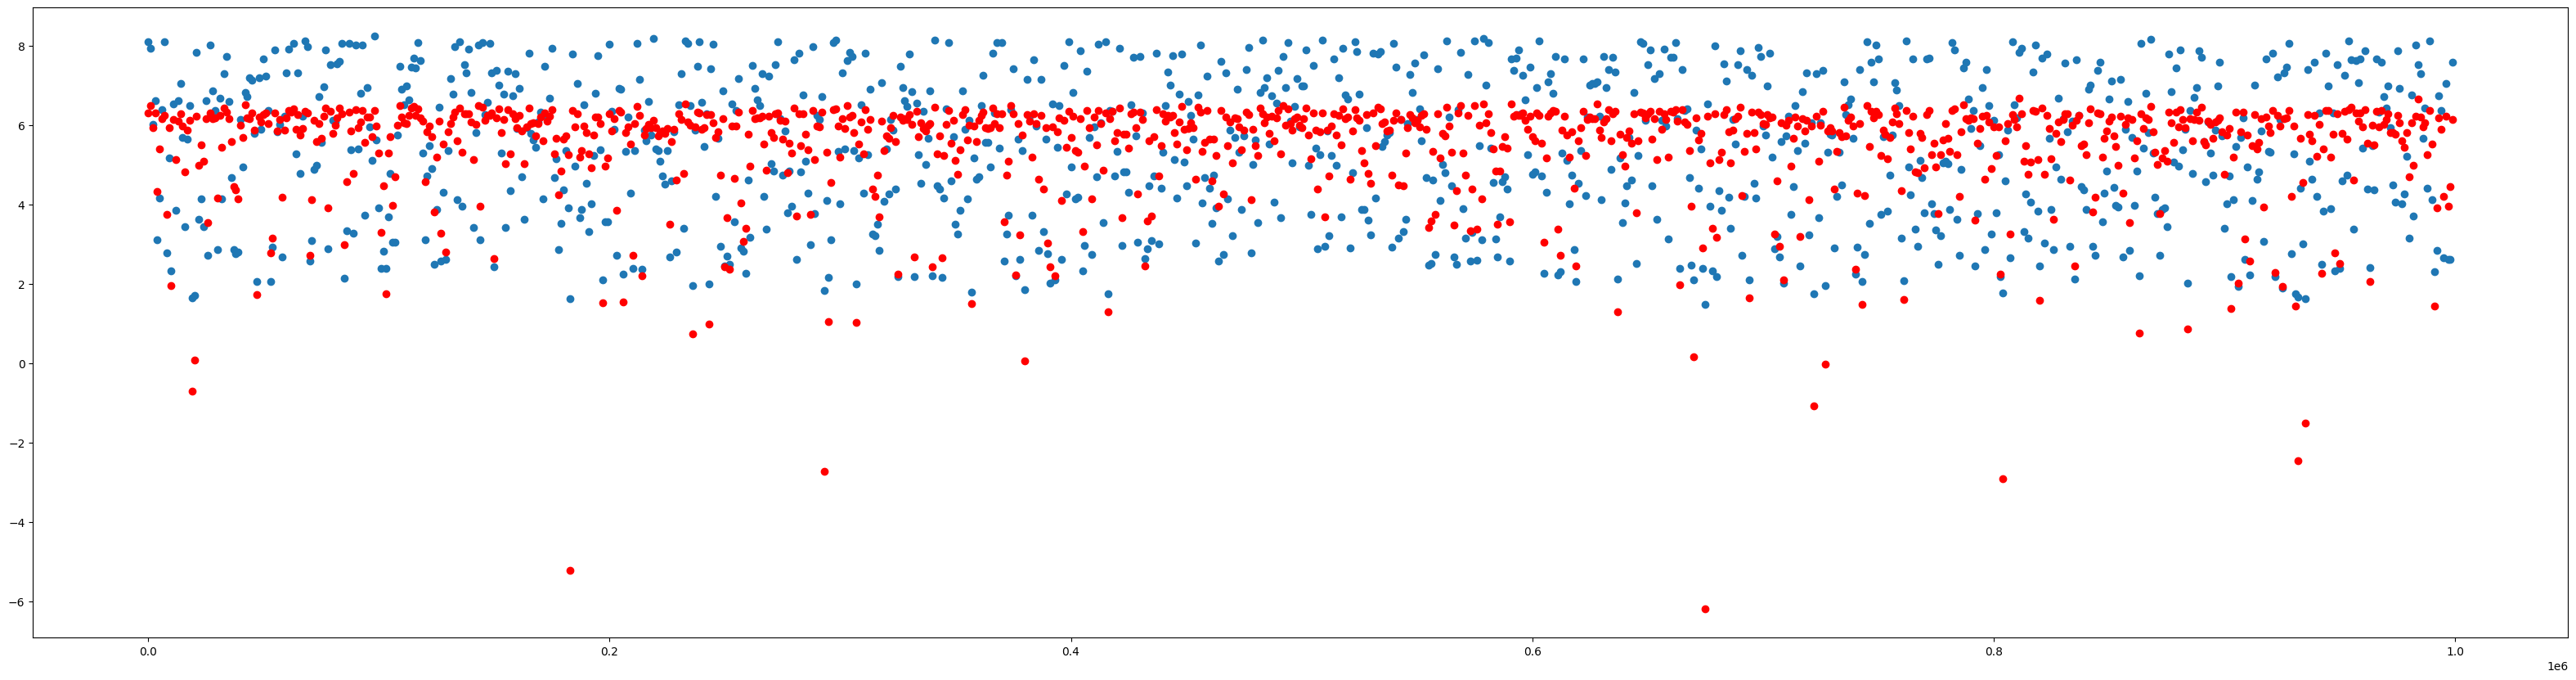

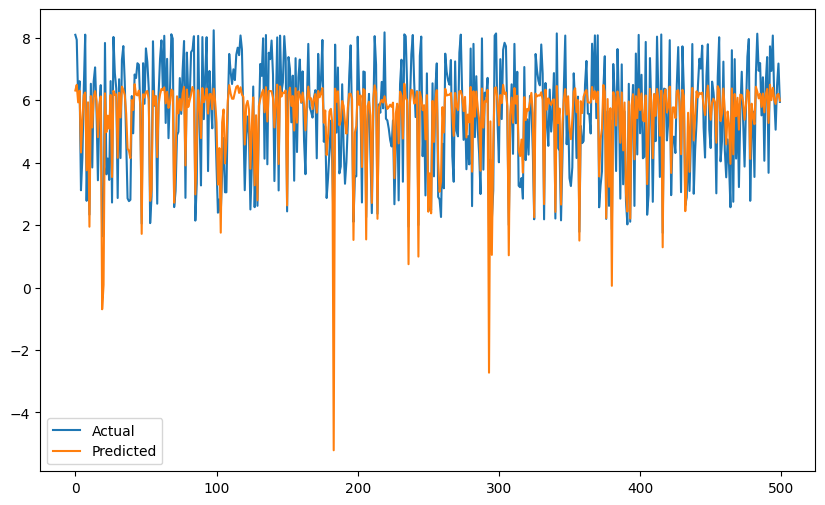

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
lr_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, lr_predictions)
print(f'{model} MAE: {mae:.4f}')
print(f'{model} MSE: {mse:.4f}')
print(f'{model} RMSE: {rmse:.4f}')
print(f'{model} R-squared: {r_squared:.4f}')
print(f'{model} MedianAE: {median_absolute_error(y_test, lr_predictions):.4f}')
print(f'{model} MaxError: {max_error(y_test, lr_predictions):.4f}')

plot_scatter(lr_predictions, y_test, "RidgeCV")


plt.figure(figsize=(40,10))
plt.scatter(list(range(0,1000*1000,1000)),y_test.tolist()[0:1000])
plt.scatter(list(range(0,1000*1000,1000)),lr_predictions.tolist()[0:1000],color="red")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:500],label='Actual')
plt.plot(lr_predictions[:500],label='Predicted')
plt.legend()
plt.show()

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) MAE: 0.9725
RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) MSE: 1.3337
RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) RMSE: 1.1549
RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) R-squared: 0.6048
RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) MedianAE: 0.9809
RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]) MaxError: 15.4475


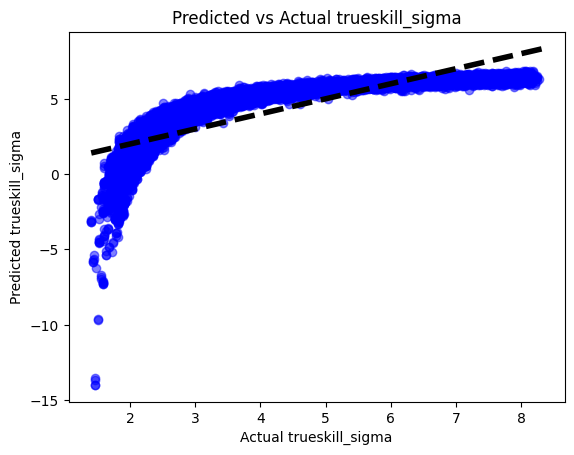

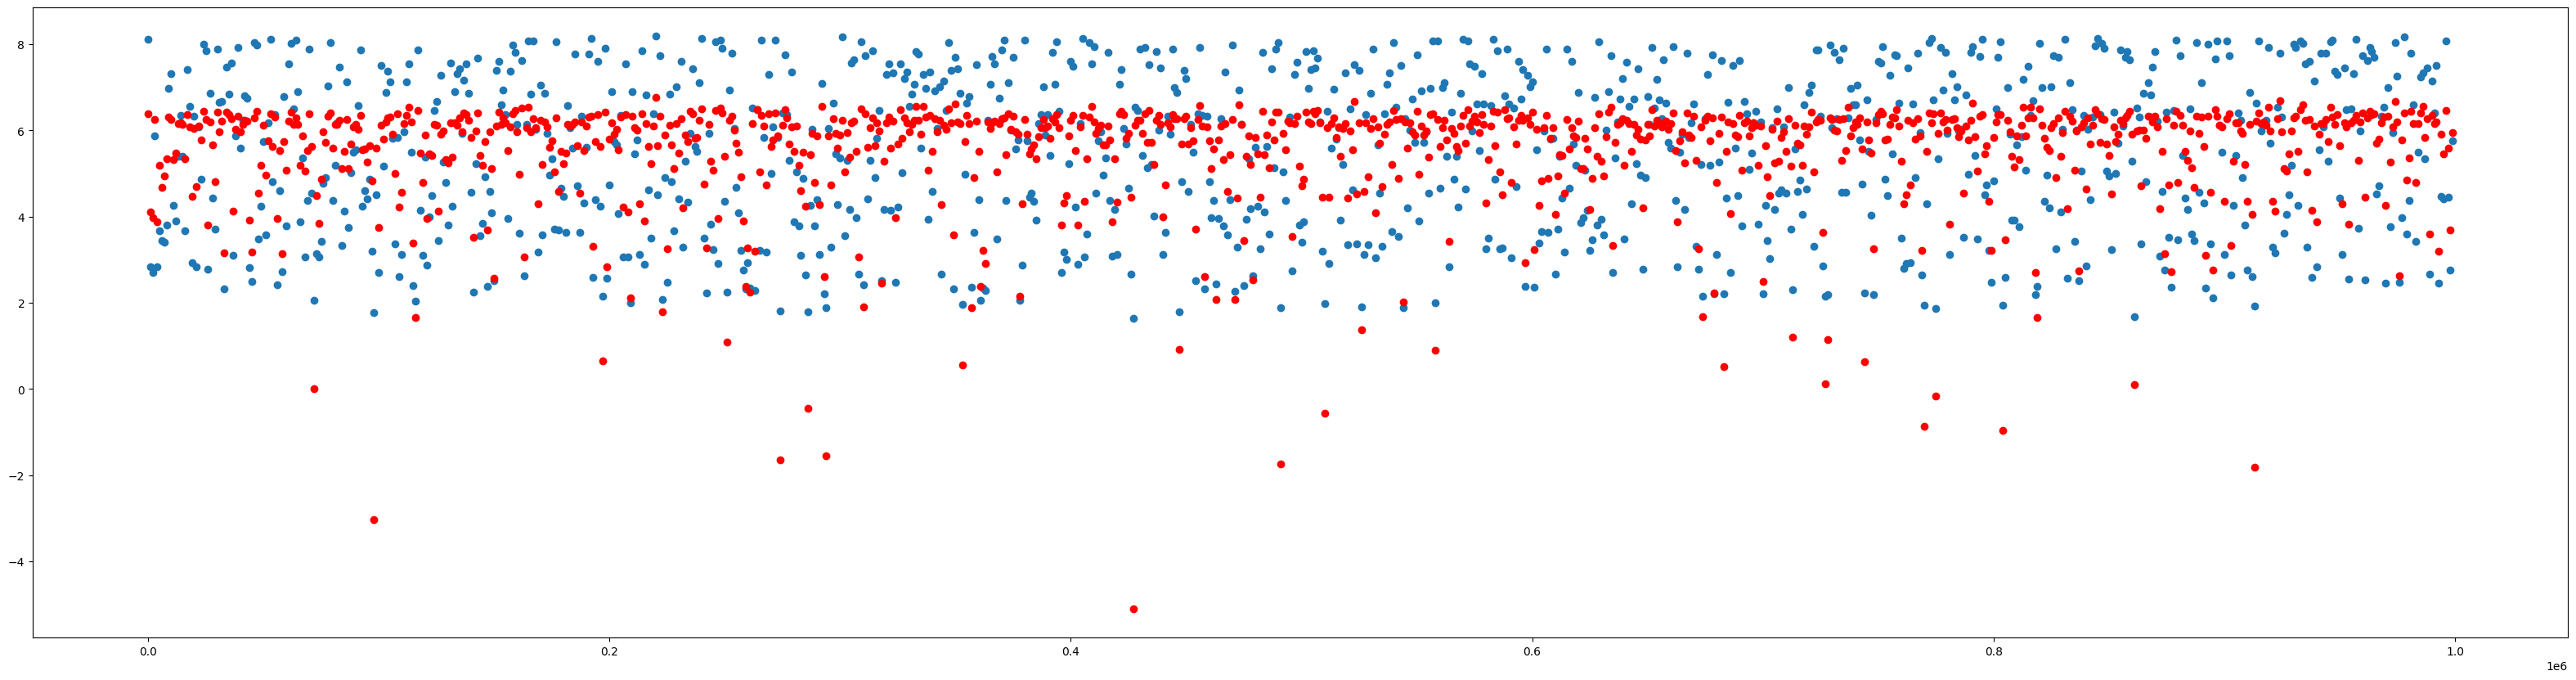

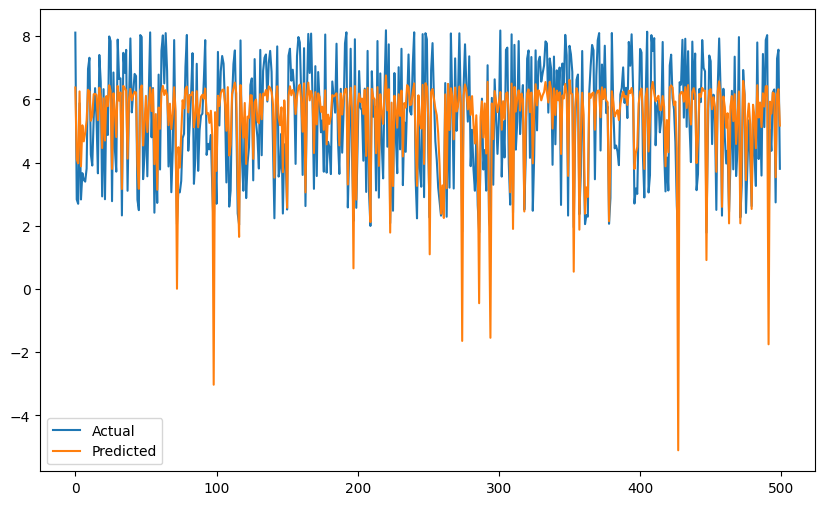

10000.0


In [63]:
model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
model.fit(X_train, y_train)
ridge_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, ridge_predictions)
mae = mean_absolute_error(y_test, ridge_predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, ridge_predictions)
print(f'{model} MAE: {mae:.4f}')
print(f'{model} MSE: {mse:.4f}')
print(f'{model} RMSE: {rmse:.4f}')
print(f'{model} R-squared: {r_squared:.4f}')
print(f'{model} MedianAE: {median_absolute_error(y_test, ridge_predictions):.4f}')
print(f'{model} MaxError: {max_error(y_test, ridge_predictions):.4f}')

plot_scatter(ridge_predictions, y_test, "RidgeCV")

plt.figure(figsize=(40,10))
plt.scatter(list(range(0,1000*1000,1000)),y_test.tolist()[0:1000])
plt.scatter(list(range(0,1000*1000,1000)),ridge_predictions.tolist()[0:1000],color="red")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:500],label='Actual')
plt.plot(ridge_predictions[:500],label='Predicted')
plt.legend()
plt.show()

print(model.alpha_)

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100]) MAE: 0.9725
LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100]) MSE: 1.3337
LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100]) RMSE: 1.1548
LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100]) R-squared: 0.6048
LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100]) MedianAE: 0.9809
LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100]) MaxError: 15.4493


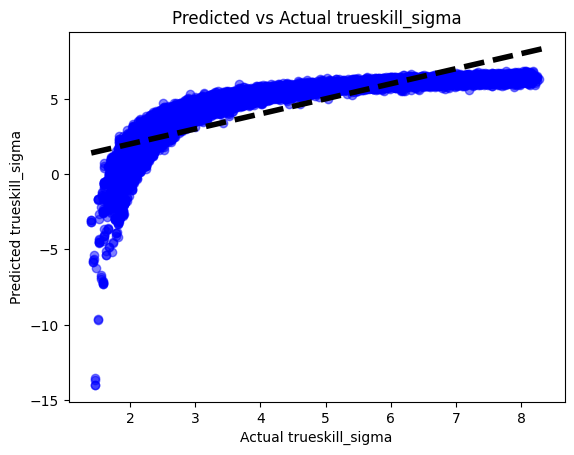

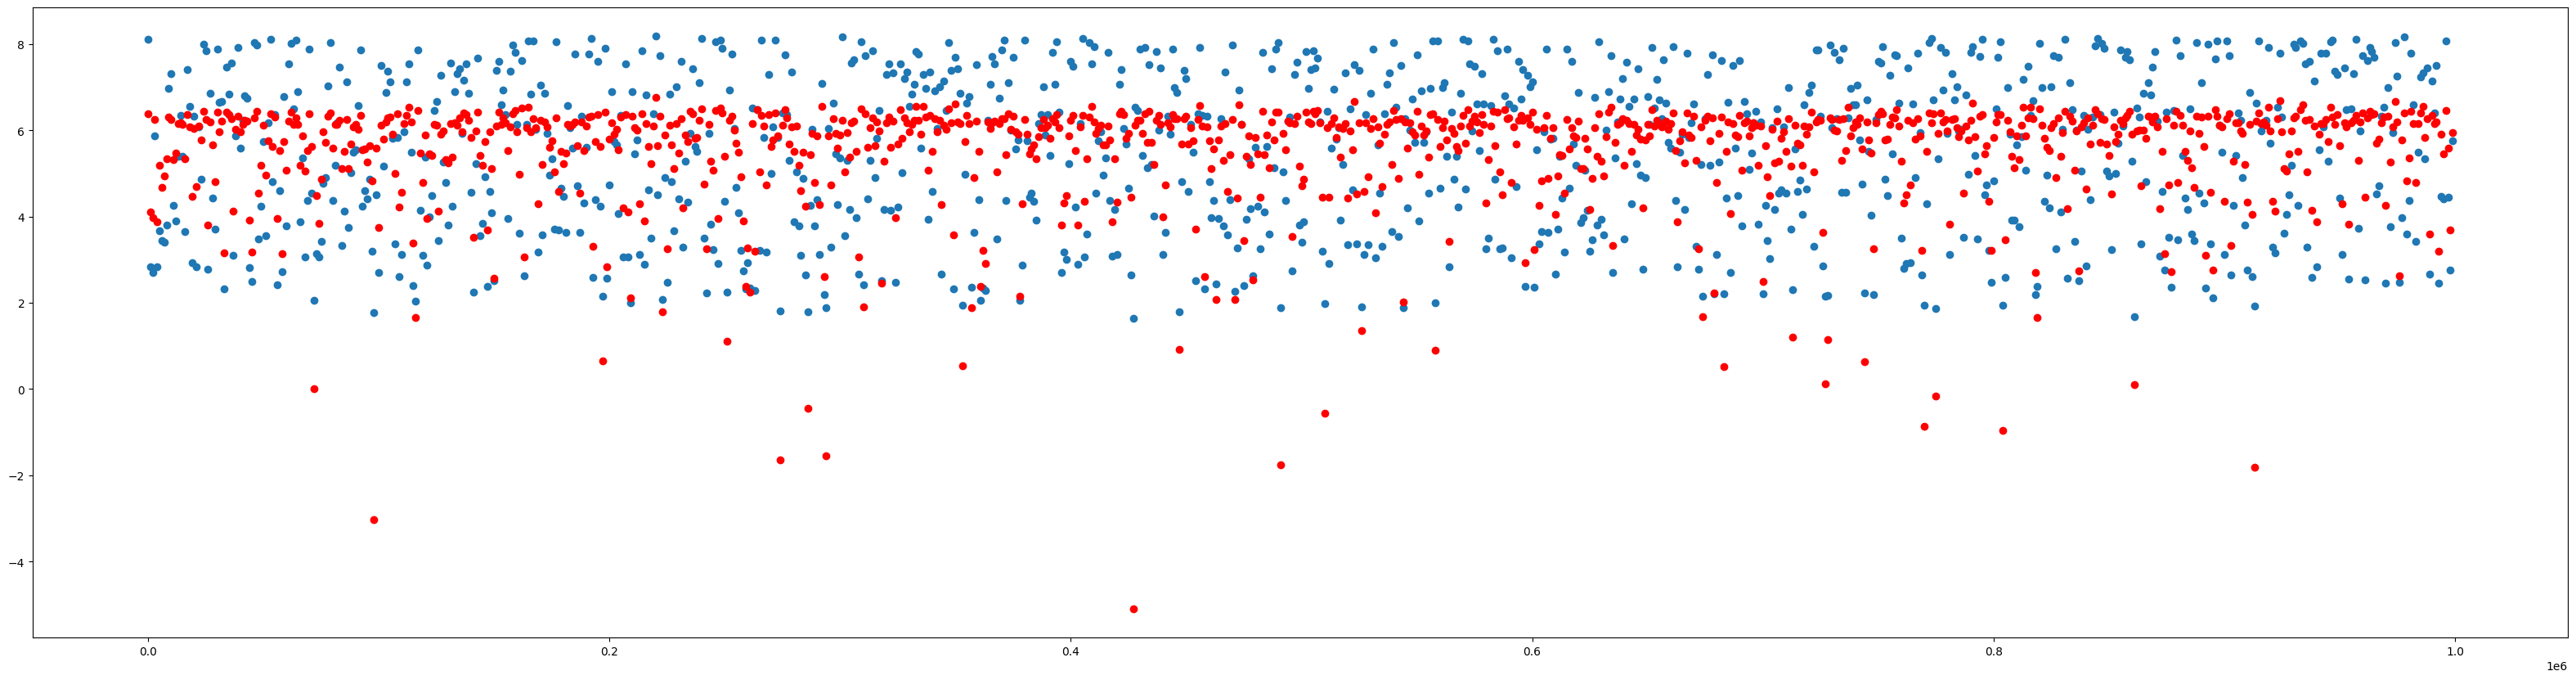

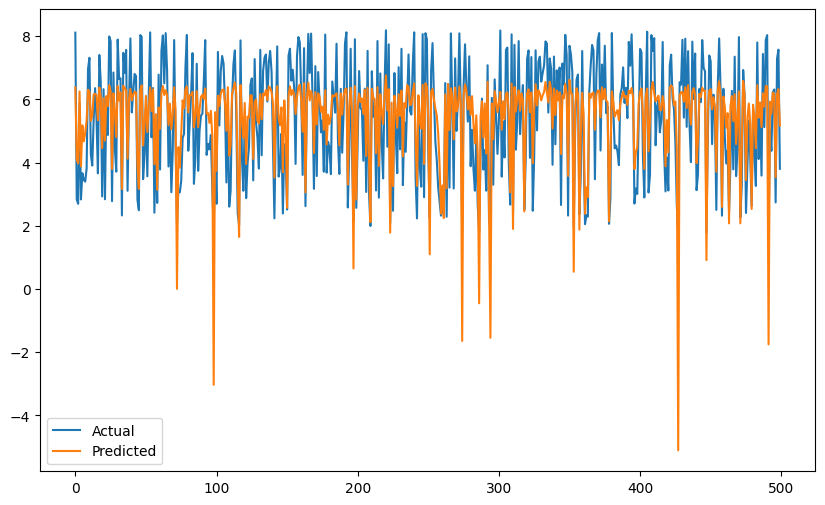

In [70]:
model = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100])
model.fit(X_train, y_train)
lasso_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, lasso_predictions)
mae = mean_absolute_error(y_test, lasso_predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, lasso_predictions)
print(f'{model} MAE: {mae:.4f}')
print(f'{model} MSE: {mse:.4f}')
print(f'{model} RMSE: {rmse:.4f}')
print(f'{model} R-squared: {r_squared:.4f}')
print(f'{model} MedianAE: {median_absolute_error(y_test, lasso_predictions):.4f}')
print(f'{model} MaxError: {max_error(y_test, lasso_predictions):.4f}')

plot_scatter(lasso_predictions, y_test, "LassoCV")

plt.figure(figsize=(40,10))
plt.scatter(list(range(0,1000*1000,1000)),y_test.tolist()[0:1000])
plt.scatter(list(range(0,1000*1000,1000)),lasso_predictions.tolist()[0:1000],color="red")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:500],label='Actual')
plt.plot(lasso_predictions[:500],label='Predicted')
plt.legend()
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

scaler = StandardScaler()
X = scaler.fit_transform(X)

FNN_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

FNN_model.compile(optimizer='adam', loss='mean_squared_error')

history = FNN_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

mse = FNN_model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

predictions = FNN_model.predict(X_test)

Epoch 1/20
3458/3458 [==============================] - 11s 3ms/step - loss: 2728.3596 - val_loss: 833.1556
Epoch 2/20
3458/3458 [==============================] - 9s 3ms/step - loss: 253.4002 - val_loss: 242.1433
Epoch 3/20
3458/3458 [==============================] - 9s 3ms/step - loss: 306.6963 - val_loss: 27.4196
Epoch 4/20
3458/3458 [==============================] - 9s 3ms/step - loss: 45.8811 - val_loss: 60.5771
Epoch 5/20
3458/3458 [==============================] - 8s 2ms/step - loss: 32.9205 - val_loss: 6.5115
Epoch 6/20
3458/3458 [==============================] - 9s 3ms/step - loss: 22.8309 - val_loss: 10.0430
Epoch 7/20
3458/3458 [==============================] - 10s 3ms/step - loss: 18.1170 - val_loss: 5.1566
Epoch 8/20
3458/3458 [==============================] - 8s 2ms/step - loss: 11.3792 - val_loss: 5.0665
Epoch 9/20
3458/3458 [==============================] - 11s 3ms/step - loss: 9.0143 - val_loss: 3.3099
Epoch 10/20
3458/3458 [==============================] - 10s

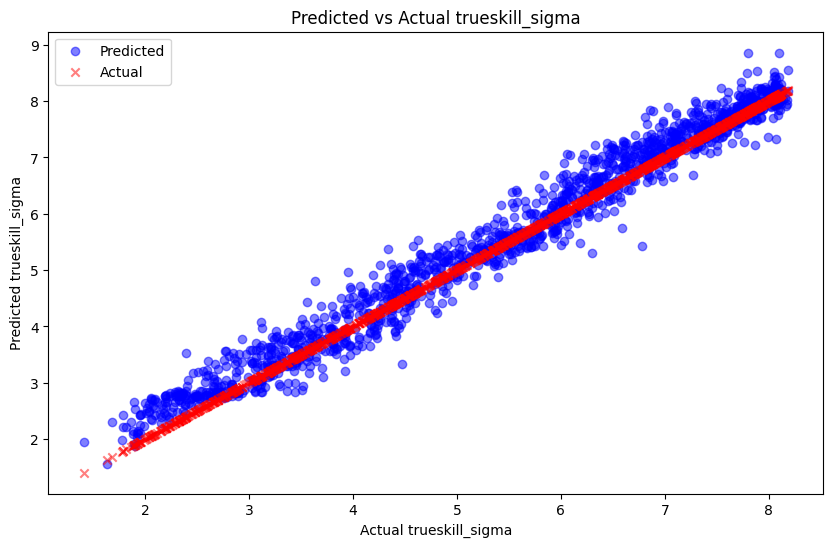

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test.values[:1500], predictions[:1500], color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test.values[:1500], y_test.values[:1500], color='red', alpha=0.5, label='Actual', marker='x')

plt.title('Predicted vs Actual trueskill_sigma')
plt.xlabel('Actual trueskill_sigma')
plt.ylabel('Predicted trueskill_sigma')
plt.legend()
plt.show()

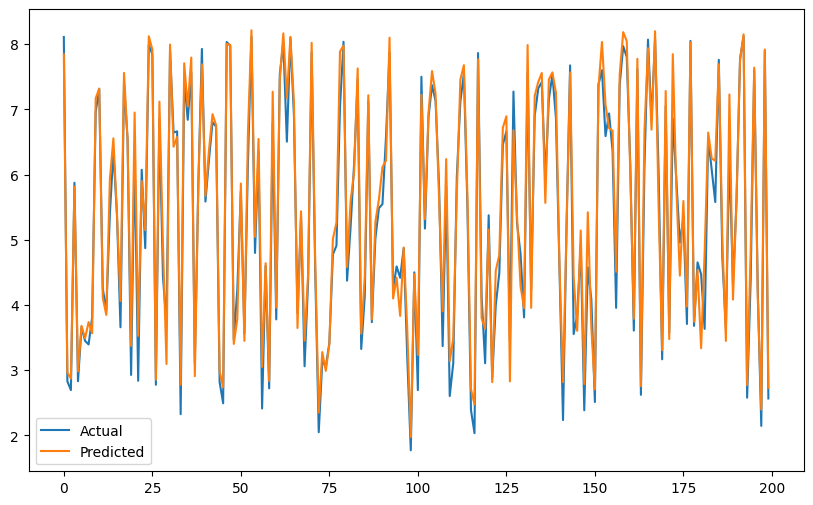

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:200],label='Actual')
plt.plot(predictions[:200],label='Predicted')
plt.legend()
plt.show()

In [38]:
import pickle


with open('trueskill_sigma_model.pkl', 'wb') as f:
    pickle.dump(FNN_model, f)

In [ ]:
dataset_name = 'trueskill_sigma_data.pkl'

with open(dataset_name, 'wb') as file:
    pickle.dump(player_stats_filtered, file)